<a href="https://colab.research.google.com/github/AbiramiSridharan/Time-series-ML--mini-project-on-stock-market-data/blob/main/IT_hardware_analytics_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import matplotlib.dates as mtd
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from IPython.display import HTML
import missingno as msno
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot
import pmdarima as pm
import math
%matplotlib inline

In [ ]:
dfIT=pd.read_excel('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/z-IT Hardware Quarters Consolidate.xlsx')
dfelect=pd.read_csv('/content/drive/MyDrive/AbiML/Colab Notebooks/colab datas/Electronics_final.csv')
dfIT.head()

,Date,Sales,Expenses,Net profit,Company Name
0,2018-12-31,87.17,78.42,2.82,CEREBRA INTEGRATED TECHNOLOGIES LTD
1,2019-03-31,78.11,66.13,-23.37,CEREBRA INTEGRATED TECHNOLOGIES LTD
2,2019-06-30,40.26,31.54,5.91,CEREBRA INTEGRATED TECHNOLOGIES LTD
3,2019-09-30,53.75,43.45,7.73,CEREBRA INTEGRATED TECHNOLOGIES LTD
4,2019-12-31,48.19,34.52,9.47,CEREBRA INTEGRATED TECHNOLOGIES LTD


In [ ]:
dfIT.tail()

,Date,Sales,Expenses,Net profit,Company Name
125,2020-03-01,16.59,12.94,-1.03,WEP SOLUTIONS LTD
126,2020-06-01,8.98,8.40,-2.01,WEP SOLUTIONS LTD
127,2020-09-01,13.62,11.08,-0.49,WEP SOLUTIONS LTD
128,2020-12-01,17.23,13.71,0.44,WEP SOLUTIONS LTD
129,2021-03-01,24.66,20.62,0.94,WEP SOLUTIONS LTD


In [ ]:
dfIT['Date']=pd.to_datetime(dfIT['Date'])


In [ ]:
dfIT['Sales'] = pd.to_numeric(dfIT['Sales'],errors = 'coerce')
dfIT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          130 non-null    datetime64[ns]
 1   Sales         121 non-null    float64       
 2   Expenses      130 non-null    float64       
 3   Net profit    130 non-null    float64       
 4   Company Name  130 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 5.2+ KB


**Checking null values using Barplot**

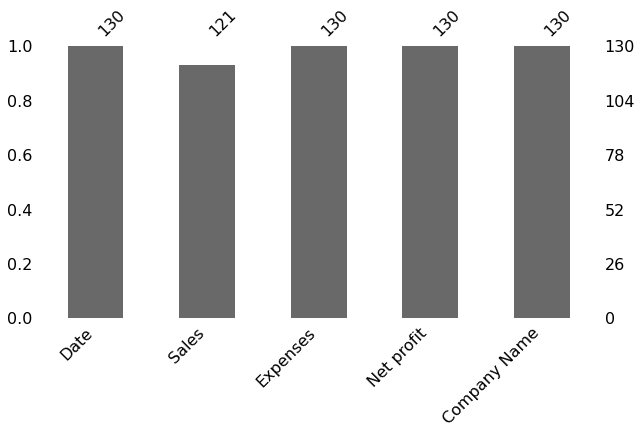

In [ ]:
msno.bar(dfIT,figsize=(10,5))

null values in date wise are not exposed, so we can group in and see

In [ ]:
dfIT.groupby('Company Name').count()

,Date,Sales,Expenses,Net profit
Company Name,,,,
CEREBRA INTEGRATED TECHNOLOGIES LTD,10,10,10,10
COMPUAGE INFOCOM LTD,10,10,10,10
D-LINK INDIA LTD,10,10,10,10
ECS BIZTECH LTD,10,10,10,10
HCL INFOSYSTEMS LTD,10,10,10,10
MRO-TEK REALTY LTD,10,10,10,10
PANACHE DIGILIFE LTD,10,10,10,10
PCS TECHNOLOGY LTD,10,10,10,10
SPEL SEMICONDUCTOR LTD,10,10,10,10


Replacing null values as 0

In [ ]:
dfIT['Sales'] = dfIT['Sales'].replace(np.nan, 0)

In [ ]:
#checking 
dfIT.isnull().sum()

Date            0
Sales           0
Expenses        0
Net profit      0
Company Name    0
dtype: int64

Checking For Duplicate records

In [ ]:
df=dfIT.duplicated().sum()
df

0

Checking Outliers

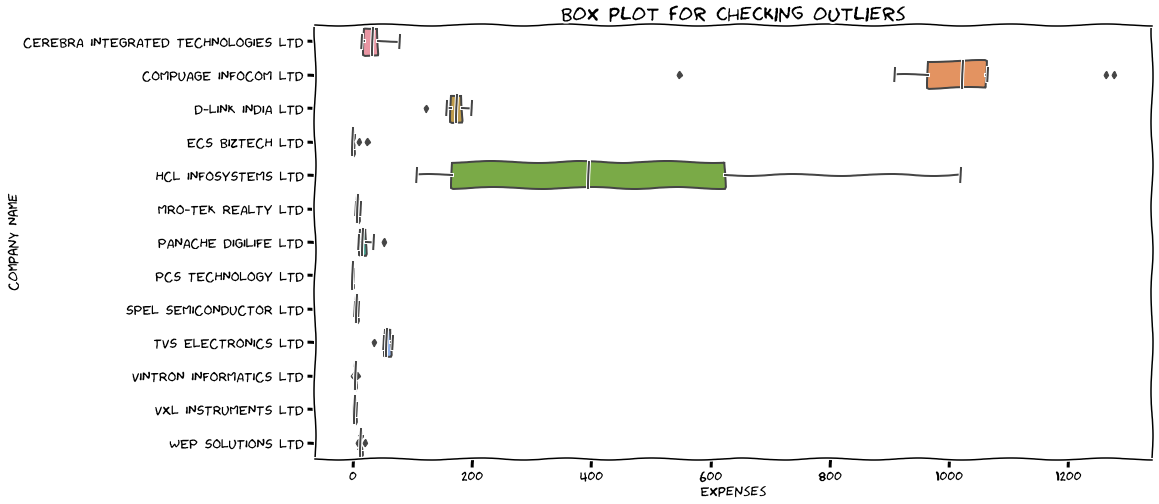

In [ ]:
with plt.xkcd():
  fig=plt.figure(figsize=(15,8))
  sns.boxplot(data=dfIT,x='Expenses',y='Company Name')
  plt.title("Box plot for checking outliers" ,size=20)

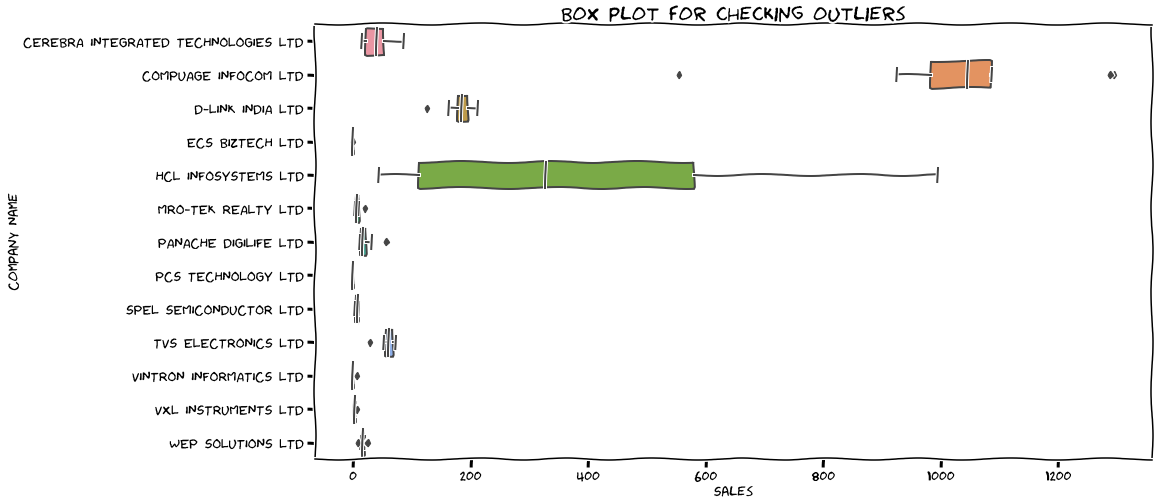

In [ ]:
with plt.xkcd():
  fig=plt.figure(figsize=(15,8))
  sns.boxplot(data=dfIT,x='Sales',y='Company Name')
  plt.title("Box plot for checking outliers" ,size=20)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 8722 missing from current font.



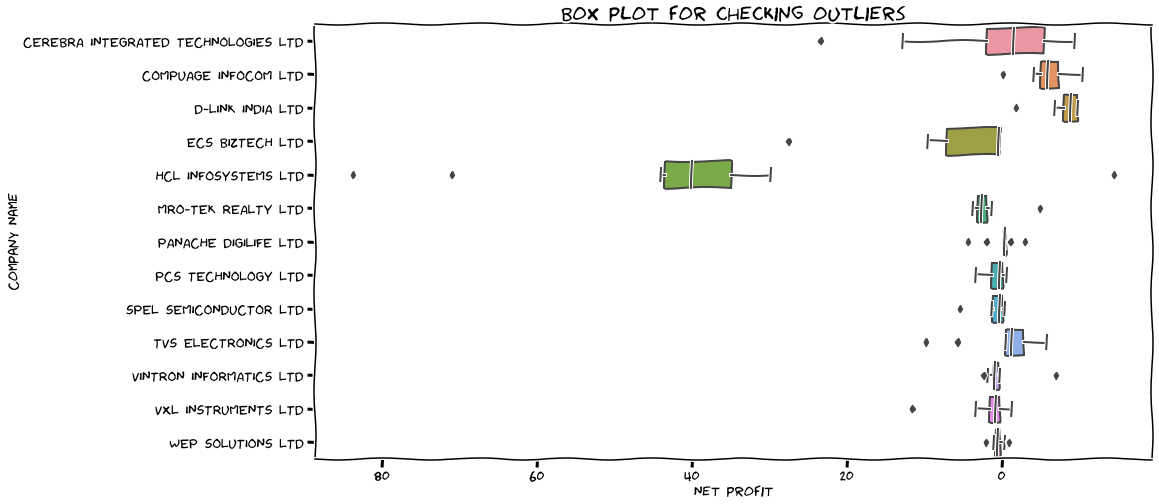

In [ ]:
with plt.xkcd():
  fig=plt.figure(figsize=(15,8))
  sns.boxplot(data=dfIT,x='Net profit',y='Company Name')
  plt.title("Box plot for checking outliers" ,size=20)

**Scatterplot**






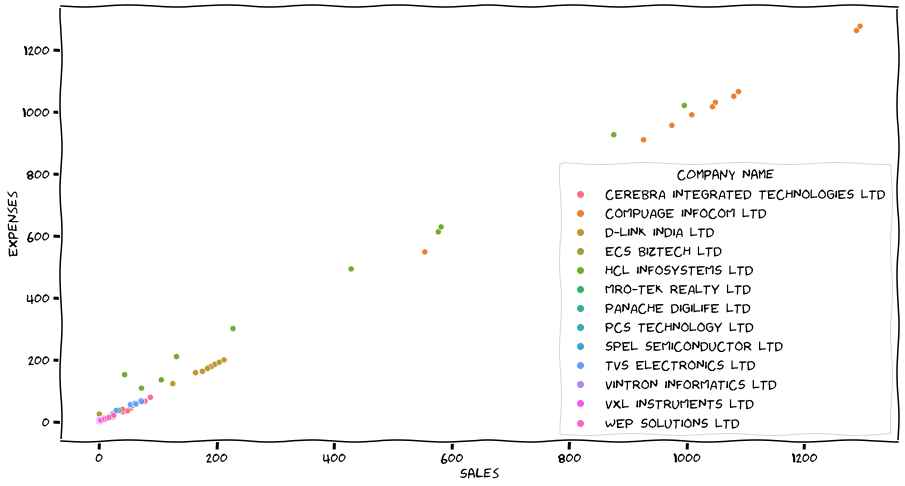

In [ ]:
with plt.xkcd():
  fig=plt.figure(figsize=(15,8))
  sns.scatterplot(x='Sales',y='Expenses',data=dfIT,hue='Company Name',sizes=20)


Univariate analysis and distribution

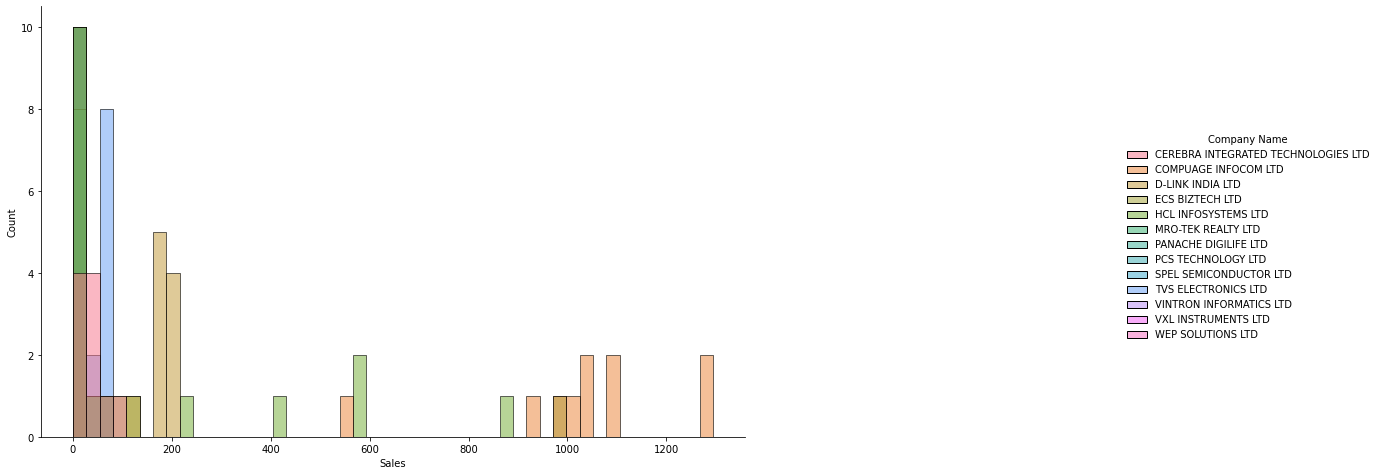

In [ ]:

ax=sns.displot(data=dfIT,x='Sales',kind='hist',legend=True,hue='Company Name')
ax.fig.set_size_inches(20,7)

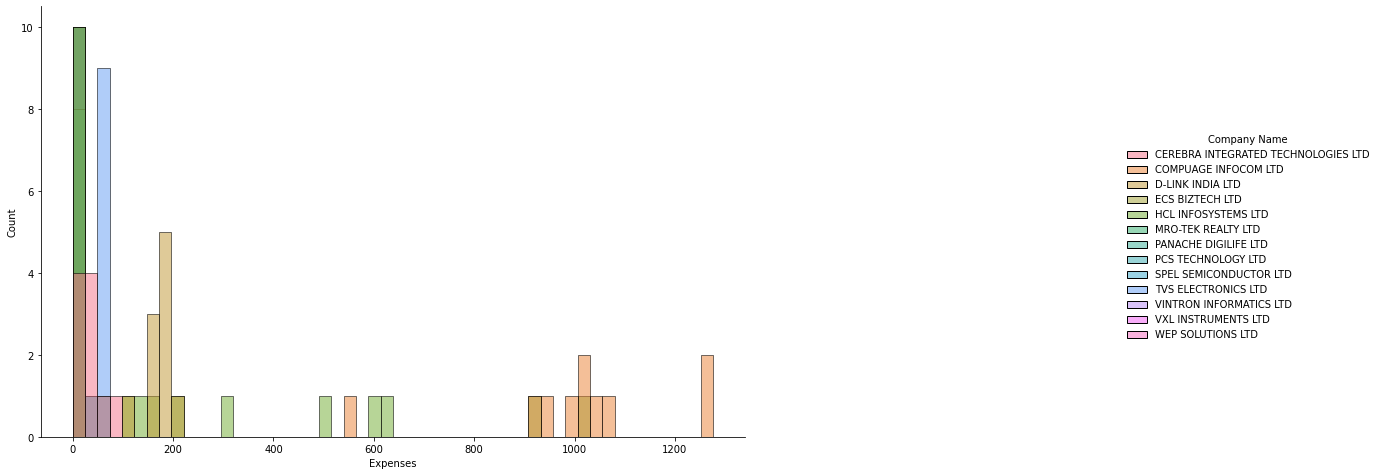

In [ ]:

ax=sns.displot(data=dfIT,x='Expenses',kind='hist',legend=True,hue='Company Name')
ax.fig.set_size_inches(20,7)

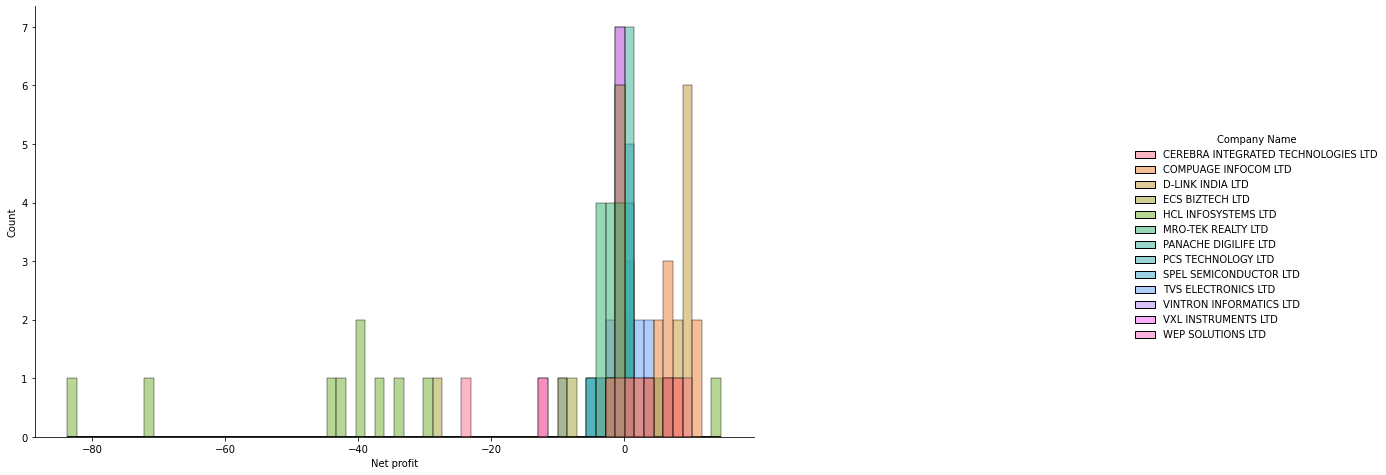

In [ ]:

ax=sns.displot(data=dfIT,x='Net profit',kind='hist',legend=True,hue='Company Name')
ax.fig.set_size_inches(20,7)

**Categorical Vs Continouse variables-->Bar chart companywise**

In [ ]:
#with plt.xkcd():

#fig = px.bar(dfIT, x="Company Name", y="Expenses", color="Company Name",hover_name='Date',color_continuous_scale=30)
#fig.update_layout(xaxis={'categoryorder':'total descending'})
#fig.show()

In [ ]:
cols = dfIT[["Date","Sales",'Expenses','Net profit','Company Name']]
newdf=cols.copy()


In [ ]:
newdf.sort_values('Date', ascending=True, ignore_index=True, inplace=True)
#newdf.set_index('Date',inplace=True)


In [ ]:
newdf['year'] = newdf['Date'].dt.year
fig = px.bar(newdf, x='Company Name', y='Sales', animation_frame=newdf.year,hover_name='Sales',color='Company Name')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
fig.update_layout(xaxis={'categoryorder':'total descending'},)
fig.show()

In [ ]:
#import plotly.express as px

#px.scatter(newdf, x="Expenses", y="Sales", animation_frame="Date", animation_group="Date",size='Expenses',
 #           color="Company Name", hover_name="Sales",log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [ ]:

newdf['year'] = newdf['Date'].dt.year
fig = px.bar(newdf, x='Company Name', y='Expenses', animation_frame=newdf.year,hover_name='Expenses',color='Company Name')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 2000
fig.update_layout(xaxis={'categoryorder':'total descending'},)
fig.show()


In [ ]:
newdf['year'] = newdf['Date'].dt.year
fig = px.bar(newdf, x='Company Name', y='Net profit', animation_frame=newdf.year,hover_name='Net profit',color='Company Name')
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 3000
fig.update_layout(xaxis={'categoryorder':'total descending'},)
fig.show()

# ** IT Hardware Domain Trend Quarterwise**

In [ ]:
quarterwise=dfIT.groupby('Date').sum().sort_values(['Date'],ascending=True).reset_index()
quarterwise=pd.DataFrame(quarterwise)
quarterwise

,Date,Sales,Expenses,Net profit
0,2018-09-01,6.08,7.55,-1.28
1,2018-12-01,110.62,110.40,-3.14
2,2018-12-31,2312.94,2301.40,-24.29
3,2019-03-01,141.86,143.70,-16.47
4,2019-03-31,2438.61,2458.54,-66.90
5,2019-06-01,103.65,99.95,-3.44
6,2019-06-30,1735.28,1736.39,-25.64
7,2019-09-01,115.75,109.24,-0.17
8,2019-09-30,2136.33,2127.38,-7.18
9,2019-12-01,116.39,109.90,7.02


**Checking for Seasonality and trend via plotting Sale net profit**

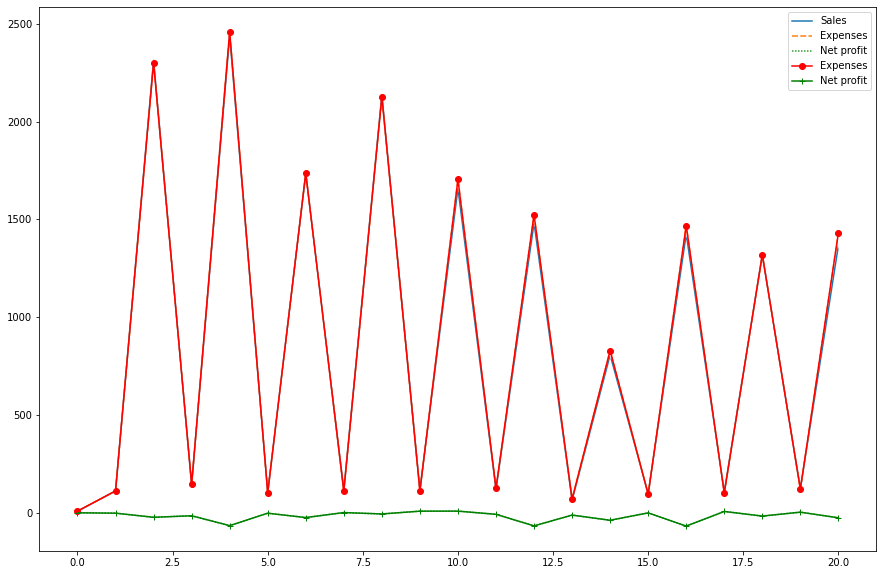

In [ ]:
fig=plt.figure(figsize=(15,10))

ax=sns.lineplot(data=quarterwise,marker='+')
quarterwise['Expenses'].plot(marker='o',ax=ax,color='red',legend=True)

quarterwise['Net profit'].plot(marker='+',ax=ax,color='green',legend=True)

# ***Prediction using FB Prophet ***

** Prediction==>Net Profit**

In [ ]:
from fbprophet import Prophet
# Initialize the Model
modelnp=Prophet()

In [ ]:
q=quarterwise[['Date','Net profit']]
quarterwisenp=q.copy()

In [ ]:
quarterwisenp.columns = ['ds','y']
quarterwisenp.head()

,ds,y
0,2018-09-01,-1.28
1,2018-12-01,-3.14
2,2018-12-31,-24.29
3,2019-03-01,-16.47
4,2019-03-31,-66.90


In [ ]:
modelnp.fit(quarterwisenp)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
future_datesnp=modelnp.make_future_dataframe(periods=4,freq='Q')

In [ ]:
predictionnp=modelnp.predict(future_datesnp)
predictionnp

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-01,-43.529442,-19.314829,-4.850185,-43.529442,-43.529442,31.458296,31.458296,31.458296,31.458296,31.458296,31.458296,0.0,0.0,0.0,-12.071147
1,2018-12-01,-40.346581,-15.456961,-1.428973,-40.346581,-40.346581,31.993997,31.993997,31.993997,31.993997,31.993997,31.993997,0.0,0.0,0.0,-8.352585
2,2018-12-31,-39.297287,-27.216728,-13.665975,-39.297287,-39.297287,18.787644,18.787644,18.787644,18.787644,18.787644,18.787644,0.0,0.0,0.0,-20.509642
3,2019-03-01,-37.198697,-23.826180,-10.186714,-37.198697,-37.198697,20.015970,20.015970,20.015970,20.015970,20.015970,20.015970,0.0,0.0,0.0,-17.182727
4,2019-03-31,-36.149402,-68.756685,-55.363718,-36.149402,-36.149402,-25.687410,-25.687410,-25.687410,-25.687410,-25.687410,-25.687410,0.0,0.0,0.0,-61.836812
5,2019-06-01,-33.980859,-9.912217,3.511262,-33.980859,-33.980859,30.483798,30.483798,30.483798,30.483798,30.483798,30.483798,0.0,0.0,0.0,-3.497061
6,2019-06-30,-32.966541,-32.333682,-18.620063,-32.966541,-32.966541,7.259196,7.259196,7.259196,7.259196,7.259196,7.259196,0.0,0.0,0.0,-25.707345
7,2019-09-01,-30.763022,0.129781,13.290151,-30.763022,-30.763022,37.640188,37.640188,37.640188,37.640188,37.640188,37.640188,0.0,0.0,0.0,6.877167
8,2019-09-30,-29.748704,-14.374676,-0.261566,-29.748704,-29.748704,22.318263,22.318263,22.318263,22.318263,22.318263,22.318263,0.0,0.0,0.0,-7.430441
9,2019-12-01,-27.580161,3.542950,17.899954,-27.580161,-27.580161,37.936373,37.936373,37.936373,37.936373,37.936373,37.936373,0.0,0.0,0.0,10.356212


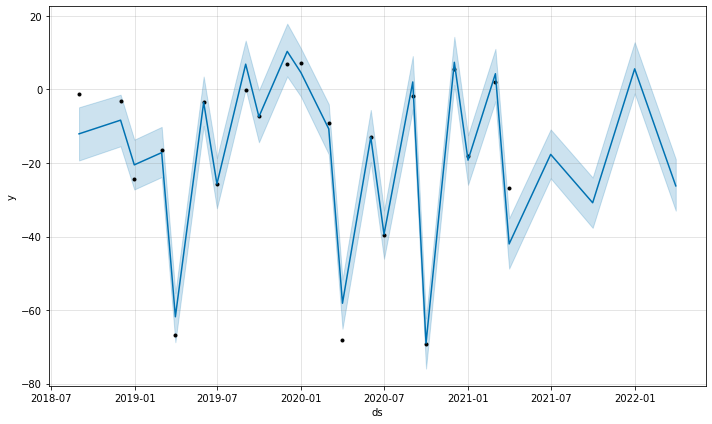

In [ ]:
modelnp.plot(predictionnp);

**Prediction==> Sales**

In [ ]:
model=Prophet()

In [ ]:
q=quarterwise[['Date','Sales']]
quarterwisesale=q.copy()


In [ ]:
quarterwisesale.columns = ['ds','y']
quarterwisesale.head()

,ds,y
0,2018-09-01,6.08
1,2018-12-01,110.62
2,2018-12-31,2312.94
3,2019-03-01,141.86
4,2019-03-31,2438.61


In [ ]:
model.fit(quarterwisesale)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
future_dates=model.make_future_dataframe(periods=4,freq='Q')

In [ ]:
prediction=model.predict(future_dates)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-01,481.540564,42.781471,366.450481,481.540564,481.540564,-281.223339,-281.223339,-281.223339,-281.223339,-281.223339,-281.223339,0.0,0.0,0.0,200.317225
1,2018-12-01,441.389215,82.851358,413.275628,441.389215,441.389215,-184.557385,-184.557385,-184.557385,-184.557385,-184.557385,-184.557385,0.0,0.0,0.0,256.831830
2,2018-12-31,428.152505,1806.113780,2117.354359,428.152505,428.152505,1538.503012,1538.503012,1538.503012,1538.503012,1538.503012,1538.503012,0.0,0.0,0.0,1966.655516
3,2019-03-01,401.679085,24.317583,358.605885,401.679085,401.679085,-213.290347,-213.290347,-213.290347,-213.290347,-213.290347,-213.290347,0.0,0.0,0.0,188.388738
4,2019-03-31,388.442373,2228.913881,2545.120537,388.442373,388.442373,2003.133721,2003.133721,2003.133721,2003.133721,2003.133721,2003.133721,0.0,0.0,0.0,2391.576095
5,2019-06-01,361.086497,-51.544418,271.239472,361.086497,361.086497,-257.739914,-257.739914,-257.739914,-257.739914,-257.739914,-257.739914,0.0,0.0,0.0,103.346583
6,2019-06-30,348.291001,1568.921008,1890.210930,348.291001,348.291001,1386.222496,1386.222496,1386.222496,1386.222496,1386.222496,1386.222496,0.0,0.0,0.0,1734.513497
7,2019-09-01,320.493885,-168.830474,152.195344,320.493885,320.493885,-334.221875,-334.221875,-334.221875,-334.221875,-334.221875,-334.221875,0.0,0.0,0.0,-13.727989
8,2019-09-30,307.698386,1971.688749,2303.527753,307.698386,307.698386,1829.734357,1829.734357,1829.734357,1829.734357,1829.734357,1829.734357,0.0,0.0,0.0,2137.432743
9,2019-12-01,280.342487,-128.007780,189.360053,280.342487,280.342487,-259.106397,-259.106397,-259.106397,-259.106397,-259.106397,-259.106397,0.0,0.0,0.0,21.236090


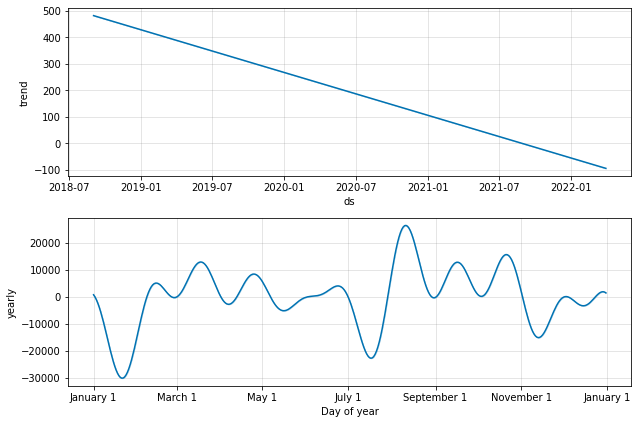

In [ ]:
model.plot_components(prediction);

In [ ]:
y_truefb =quarterwisesale['y'][-8:].values
y_truefb

array([  63.38,  806.53,   96.02, 1424.79,  105.76, 1319.6 ,  122.52,
       1366.17])

In [ ]:
y_predfb =prediction['yhat'][-8:].values
y_predfb

array([  54.60389689, 1433.9086772 ,  -19.60104246, 1503.90830564,
        912.67354456, 1436.19363346, 1384.72135564, 1622.71355732])

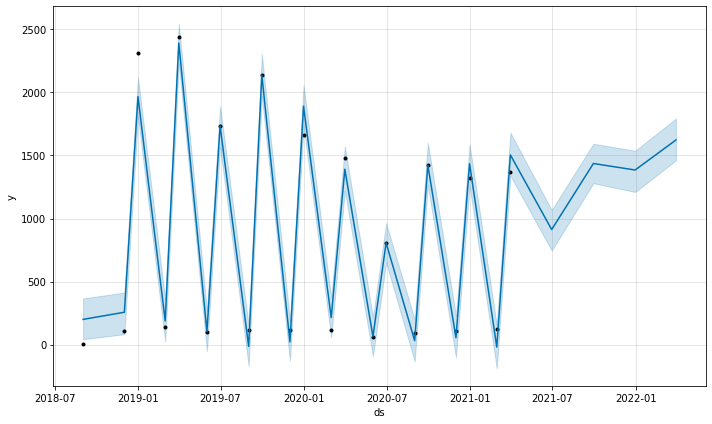

In [ ]:
model.plot(prediction);

# **Auto ARIMA, ARIMA and SARIMA

Net Profit

In [ ]:
datanp1=pd.Series(quarterwise['Net profit'].values)


In [ ]:
datanp=pd.Series(quarterwise['Net profit'].values,quarterwise['Date'])
datanp

Date
2018-09-01    -1.28
2018-12-01    -3.14
2018-12-31   -24.29
2019-03-01   -16.47
2019-03-31   -66.90
2019-06-01    -3.44
2019-06-30   -25.64
2019-09-01    -0.17
2019-09-30    -7.18
2019-12-01     7.02
2019-12-31     7.23
2020-03-01    -9.07
2020-03-31   -68.21
2020-06-01   -13.01
2020-06-30   -39.48
2020-09-01    -1.71
2020-09-30   -69.29
2020-12-01     5.51
2020-12-31   -18.09
2021-03-01     1.90
2021-03-31   -26.93
dtype: float64

plot existing data for trend and seasonality checking

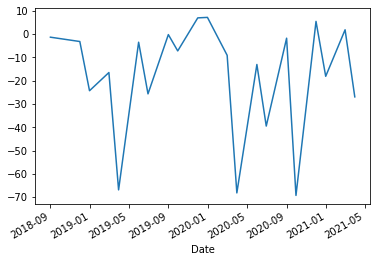

In [ ]:
datanp.plot()

**Test for Stationary **-->**ADF  Test**

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(value):
    result=adfuller(value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for val,label in zip(result,labels):
        print(label+' : '+str(val) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(datanp.values)

ADF Test Statistic : -1.2711875838850595
p-value : 0.6422488098640552
#Lags Used : 8
Number of Observations Used : 12
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


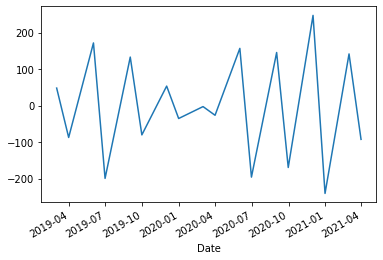

In [ ]:
dffnp=datanp.diff().diff().diff(periods=1).dropna()
dffnp.plot()

In [ ]:
adfuller_test(dffnp.values)

ADF Test Statistic : -2.0934495463936087
p-value : 0.24715671677706313
#Lags Used : 6
Number of Observations Used : 11
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**After 3 diff() also data is not stationary**

Before Log transform

(array([3., 0., 0., 1., 0., 3., 2., 2., 5., 5.]),
 array([-69.29 , -61.638, -53.986, -46.334, -38.682, -31.03 , -23.378,
        -15.726,  -8.074,  -0.422,   7.23 ]),
 <a list of 10 Patch objects>)

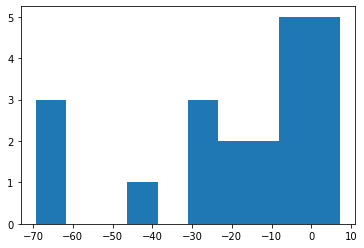

In [ ]:
pyplot.hist(datanp)

**Log Transformation**

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

invalid value encountered in log



(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([0.64185389, 0.7754924 , 0.90913092, 1.04276943, 1.17640795,
        1.31004646, 1.44368498, 1.57732349, 1.71096201, 1.84460052,
        1.97823904]),
 <a list of 10 Patch objects>)

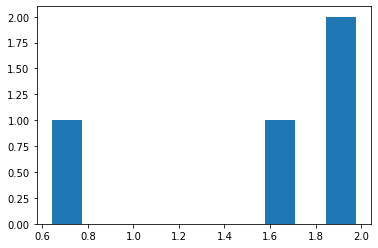

In [ ]:
logdatanp=np.log(datanp1)
pyplot.hist(logdatanp)

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([1.37840488, 1.50945098, 1.64049709, 1.77154319, 1.9025893 ,
        2.0336354 , 2.16468151, 2.29572761, 2.42677372, 2.55781983,
        2.68886593]),
 <a list of 10 Patch objects>)

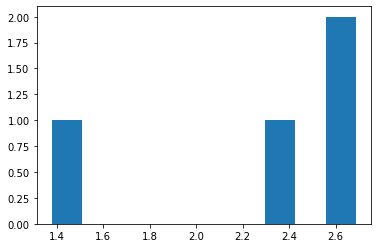

In [ ]:
sqdata=datanp**(1/2)
pyplot.hist(sqdata)

Train Test Split of netprofit

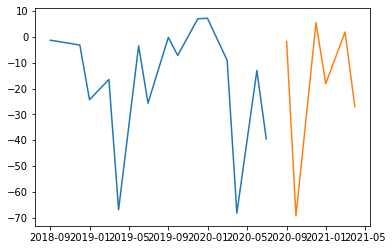

In [ ]:
trainnp=pd.DataFrame(columns=['date','y'])
testnp=pd.DataFrame(columns=['date','y'])

trainnp = datanp[:15] 
testnp = datanp[-6:]
plt.plot(trainnp)
plt.plot(testnp)

In [ ]:
model_autoARIMAnp = pm.auto_arima(trainnp,start_p=0, d=2, start_q=0,
                         max_p=5, max_d=5, max_q=5,
                         start_P=1, start_D=2, start_Q=0,
                         max_P=2, max_D=2, max_Q=0,
                         m=1, seasonal=True, error_action='warn',
                         trace=True, suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=146.396, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=135.209, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=135.898, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=137.119, Time=0.04 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 0.304 seconds


In [ ]:
predictionautonp= pd.DataFrame(model_autoARIMAnp.predict(n_periods=6),testnp.index)
predictionautonp.columns=['predicted_autonp']
predictionautonp

,predicted_autonp
Date,
2020-09-01,0.333765
2020-09-30,-13.648693
2020-12-01,16.030123
2020-12-31,10.273239
2021-03-01,33.276140
2021-03-31,32.937461


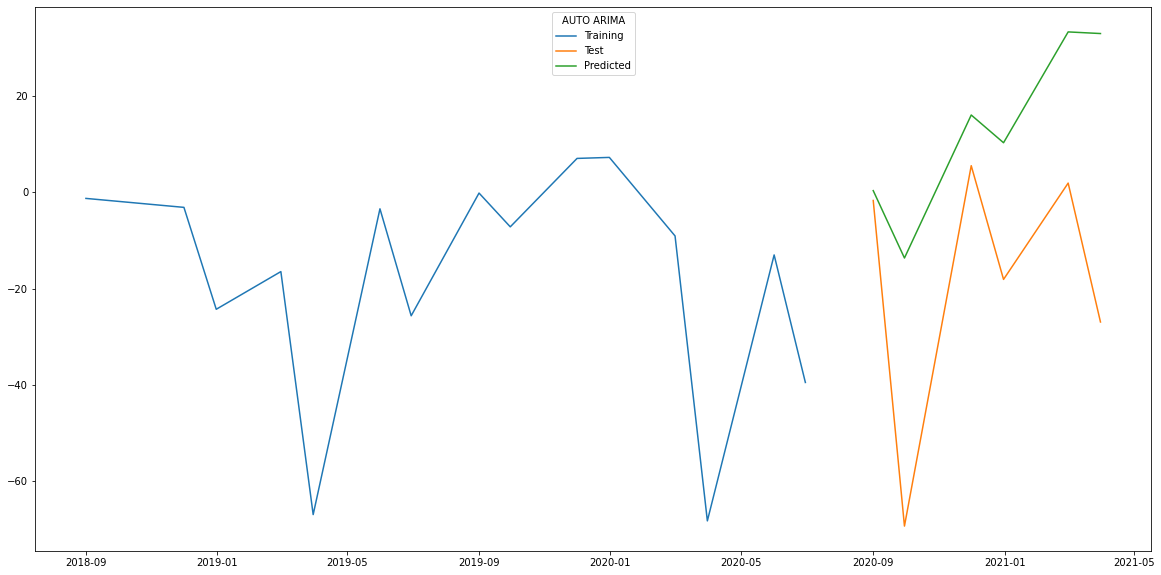

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(trainnp,label='Training')
plt.plot(testnp,label='Test')
plt.plot(predictionautonp,label='Predicted')
plt.legend(loc='upper center',title="AUTO ARIMA")
plt.show()

SALE Prediction 

In [ ]:
data=pd.Series(quarterwise['Sales'].values,quarterwise['Date'])
data

Date
2018-09-01       6.08
2018-12-01     110.62
2018-12-31    2312.94
2019-03-01     141.86
2019-03-31    2438.61
2019-06-01     103.65
2019-06-30    1735.28
2019-09-01     115.75
2019-09-30    2136.33
2019-12-01     116.39
2019-12-31    1658.50
2020-03-01     118.68
2020-03-31    1481.79
2020-06-01      63.38
2020-06-30     806.53
2020-09-01      96.02
2020-09-30    1424.79
2020-12-01     105.76
2020-12-31    1319.60
2021-03-01     122.52
2021-03-31    1366.17
dtype: float64

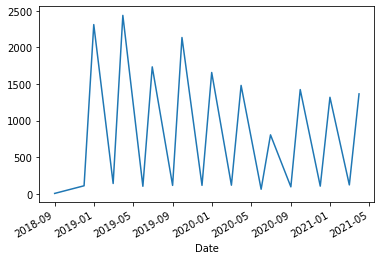

In [ ]:
data.plot()

**ADF Test For Sales **

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(value):
    result=adfuller(value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for val,label in zip(result,labels):
        print(label+' : '+str(val) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [ ]:
adfuller_test(data.values)

ADF Test Statistic : -1.014025308094706
p-value : 0.7481145823700815
#Lags Used : 7
Number of Observations Used : 13
weak evidence against null hypothesis, indicating it is non-stationary 


**To convert Non stationary Data to Stationary -->differencing-->diff()**

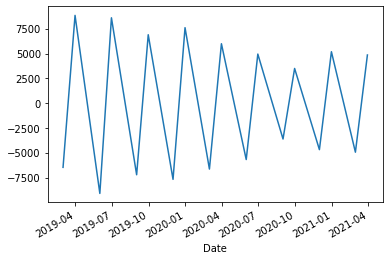

In [ ]:
dff=data.diff().diff().diff(periods=1).dropna()
dff.plot()

In [ ]:
#Ho: It is non stationary
#H1: It is stationary
#adftest()
def adfuller_test(value):
    result=adfuller(value)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for val,label in zip(result,labels):
        print(label+' : '+str(val) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
data1=pd.Series(dff).dropna()

In [ ]:
adfuller_test(data1.values)

ADF Test Statistic : -6.279799469359954
p-value : 3.8211674812339616e-08
#Lags Used : 7
Number of Observations Used : 10
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


Train Test Split

In [ ]:
data.shape

(21,)

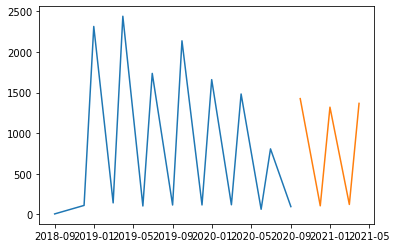

In [ ]:
train=pd.DataFrame(columns=['date','y'])
test=pd.DataFrame(columns=['date','y'])

train = data[:16] 
test = data[-5:]
plt.plot(train)
plt.plot(test)

In [ ]:
model_autoARIMA  = pm.auto_arima(train,start_p=0, d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5,
                         start_P=0, start_D=2, start_Q=0,
                         max_P=5, max_D=5, max_Q=5,
                         m=1, seasonal=True, error_action='warn',
                         trace=True, suppress_warnings=True, stepwise=True,
                         random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=269.746, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=244.041, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=267.746, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=246.041, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=246.041, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=242.131, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=244.129, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=244.129, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.076 seconds


In [ ]:
'''model_autoARIMA = pm.auto_arima(train, start_p=2, start_q=0, test='adf',       # use adftest to find             optimal 'd'
                      max_p=2, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)'''
print(model_autoARIMA.summary())

model_autoARIMA.fit(train)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -119.065
Date:                Thu, 15 Jul 2021   AIC                            242.131
Time:                        14:18:46   BIC                            243.547
Sample:                             0   HQIC                           242.116
                                 - 16                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9122      0.206     -4.424      0.000      -1.316      -0.508
sigma2      4.459e+05   8.01e+04      5.569      0.000    2.89e+05    6.03e+05
Ljung-Box (L1) (Q):                   0.01   Jarque-

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

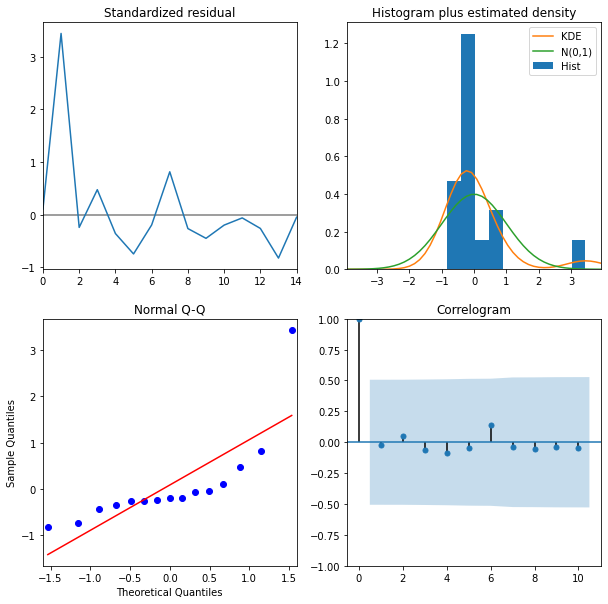

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(10,10));


Predicting for Test Data

In [ ]:
predictionauto= pd.DataFrame(model_autoARIMA.predict(n_periods=5),test.index)
predictionauto.columns=['predicted_auto']
predictionauto

,predicted_auto
Date,
2020-09-30,744.167072
2020-12-01,152.909205
2020-12-31,692.271150
2021-03-01,200.250115
2021-03-31,649.085450


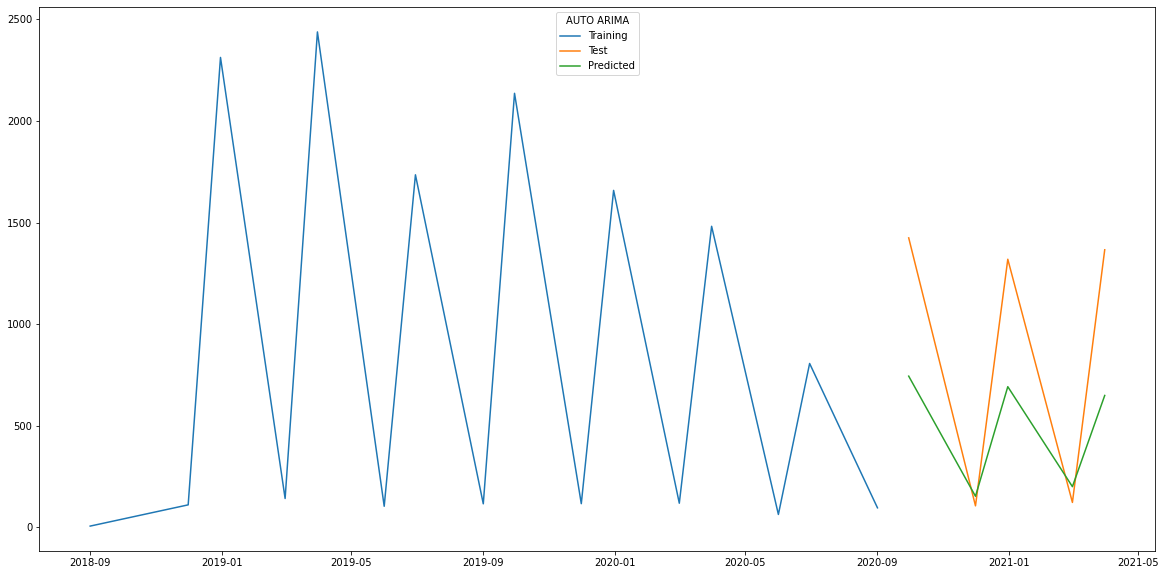

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(predictionauto,label='Predicted')
plt.legend(loc='upper center',title="AUTO ARIMA")
plt.show()

**ARIMA**

**ACf and PACF plot for Sales**

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



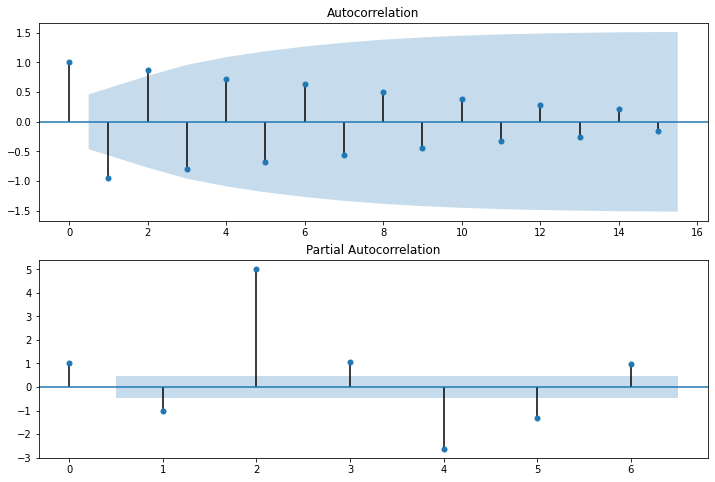

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data1.values,lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data1.values,lags=6,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
dfarima=pd.DataFrame()

dfarima=data1.to_frame()
print(dfarima)
modelarima=ARIMA(data1,order=(2,2,0))
modelarima
#model=ARIMA(data,start_P=13,D=1,start_Q=1,max_p=13,max_D=3,max_Q=3,m=4,seasonal=True,stepwise=True,n_fits=20)
model_fit=modelarima.fit()
model_fit.summary()

                  0
Date               
2019-03-01 -6471.18
2019-03-31  8841.23
2019-06-01 -9099.54
2019-06-30  8598.30
2019-09-01 -7217.75
2019-09-30  6891.27
2019-12-01 -7680.63
2019-12-31  7602.57
2020-03-01 -6643.98
2020-03-31  5984.86
2020-06-01 -5684.45
2020-06-30  4943.08
2020-09-01 -3615.22
2020-09-30  3492.94
2020-12-01 -4687.08
2020-12-31  5180.67
2021-03-01 -4943.79
2021-03-31  4851.65


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   16
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -146.196
Method:                       css-mle   S.D. of innovations           1890.364
Date:                Thu, 15 Jul 2021   AIC                            300.392
Time:                        14:18:48   BIC                            303.483
Sample:                             2   HQIC                           300.550
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.8230    162.004      0.314      0.754    -266.699     368.345
ar.L1.D2.y    -1.5417      0.213     -7.247      0.000      -1.959      -1.125
ar.L2.D2.y    -0.5478      0.216     -2.539      0.011      -0.971      -0.125
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0139           +0.0000j            1.0139            0.5000
AR.2           -1.8006           +0.0000j            1.8006            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
dfarima['forecastarima']=model_fit.predict()
print(dfarima)

                  0  forecastarima
Date                              
2019-03-01 -6471.18            NaN
2019-03-31  8841.23            NaN
2019-06-01 -9099.54      50.822992
2019-06-30  8598.30   33223.932624
2019-09-01 -7217.75  -36571.494463
2019-09-30  6891.27   32303.150374
2019-12-01 -7680.63  -27620.119546
2019-12-31  7602.57   27981.941345
2020-03-01 -6643.98  -30159.664710
2020-03-31  5984.86   29328.910599
2020-06-01 -5684.45  -25100.872445
2020-06-30  4943.08   22895.588770
2020-09-01 -3615.22  -20907.904187
2020-09-30  3492.94   17521.977941
2020-12-01 -4687.08  -13486.290859
2020-12-31  5180.67   15144.980595
2021-03-01 -4943.79  -19292.621256
2021-03-31  4851.65   21092.741187


In [ ]:
dfarima.rename(columns = {0:'y'}, inplace = True)


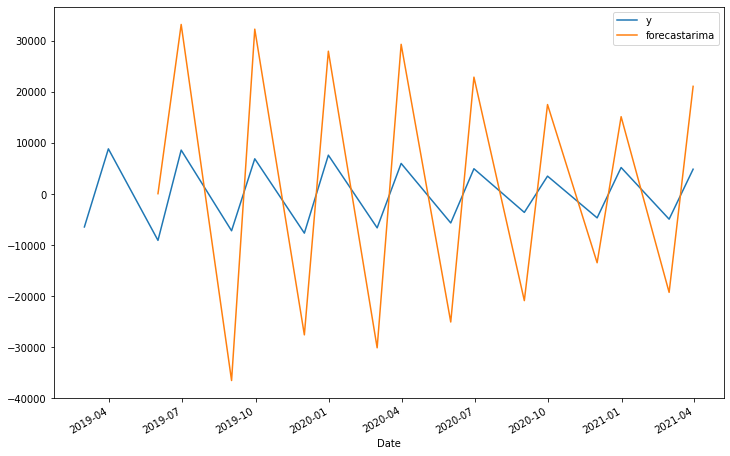

In [ ]:
dfarima[['y','forecastarima']].plot(figsize=(12,8))

In [ ]:
dfarima['forecastarima'] = dfarima['forecastarima'].replace(np.nan, 0)

In [ ]:
y=dfarima['y']
forecastarima=dfarima['forecastarima']

**SARIMA**

In [ ]:
df3sarima=pd.DataFrame()
df3sarima=data1.to_frame()
print(df3sarima)
modelsarima=sm.tsa.statespace.SARIMAX(data1,order=(1, 2, 1),seasonal_order=(1,2,0,2))
sarmodel=modelsarima.fit()

                  0
Date               
2019-03-01 -6471.18
2019-03-31  8841.23
2019-06-01 -9099.54
2019-06-30  8598.30
2019-09-01 -7217.75
2019-09-30  6891.27
2019-12-01 -7680.63
2019-12-31  7602.57
2020-03-01 -6643.98
2020-03-31  5984.86
2020-06-01 -5684.45
2020-06-30  4943.08
2020-09-01 -3615.22
2020-09-30  3492.94
2020-12-01 -4687.08
2020-12-31  5180.67
2021-03-01 -4943.79
2021-03-31  4851.65


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [ ]:
df3sarima['forecastsarima']=sarmodel.predict()

df3sarima

,0,forecastsarima
Date,,
2019-03-01,-6471.18,0.000000
2019-03-31,8841.23,-10283.679889
2019-06-01,-9099.54,3164.291288
2019-06-30,8598.30,18609.079717
2019-09-01,-7217.75,-20181.426657
2019-09-30,6891.27,15766.528866
2019-12-01,-7680.63,-9466.634683
2019-12-31,7602.57,2860.038623
2020-03-01,-6643.98,-5551.428196


In [ ]:
df3sarima.rename(columns = {0:'y'}, inplace = True)


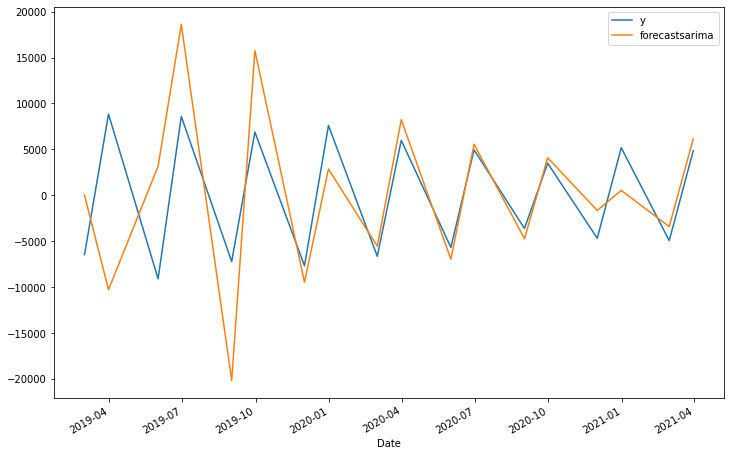

In [ ]:
df3sarima[['y','forecastsarima']].plot(figsize=(12,8))

In [ ]:
y=df3sarima['y']
forecastsarima=df3sarima['forecastsarima'].dropna()

# **PERFORMANCE METRICS **

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. Mean Absolute Percentage Error 









In [ ]:
# report performance
print("Auto Arima")
mseAuto = mean_squared_error(test,predictionauto.predicted_auto)
print('MSE-AutoArima: '+str(mseAuto))
maeAuto = mean_absolute_error(test,predictionauto.predicted_auto)
print('MAE-AutoArima: '+str(maeAuto))
rmseAuto = math.sqrt(mean_squared_error(test,predictionauto.predicted_auto))
print('RMSE-AutoArima: '+str(rmseAuto))
mapeAuto = np.mean(np.abs(predictionauto.predicted_auto -test)/np.abs(test))
print('MAPE-AutoArima: '+str(mapeAuto))
r2=r2_score(test,predictionauto.predicted_auto)
print('R square-FB: '+str(r2))

Auto Arima
MSE-AutoArima: 275852.8650522438
MAE-AutoArima: 429.9831293493515
RMSE-AutoArima: 525.2169695014088
MAPE-AutoArima: 0.5116443298700819
R square-FB: 0.273643618973894


In [ ]:
# report performance
print("FB Prophet")
msefb = mean_squared_error(y_truefb, y_predfb)
print('MSE-FB prophet: '+str(msefb))
maefb= mean_absolute_error(y_truefb, y_predfb)
print('MAE-FB prophet: '+str(maefb))
rmsefb = math.sqrt(mean_squared_error(y_truefb, y_predfb))
print('RMSE-FB prophet: '+str(rmsefb))
mapefb = np.mean(np.abs(y_predfb -y_truefb)/np.abs(y_truefb))
print('MAPE-FB prophet: '+str(mapefb))
r2=r2_score(y_truefb,y_predfb)
print('R square-FB: '+str(r2))

FB Prophet
MSE-FB prophet: 342122.4198845565
MAE-FB prophet: 409.14327742442885
RMSE-FB prophet: 584.9123181166186
MAPE-FB prophet: 2.547976789744633
R square-FB: 0.026035181064461344


In [ ]:
# report performance
print("ARIMA")
mseAR = mean_squared_error(y,forecastarima)
print('MSE-ARIMA: '+str(mseAR))
maeAR= mean_absolute_error(y, forecastarima)
print('MAE-ARIMA: '+str(maeAR))
rmseAR = math.sqrt(mean_squared_error(y, forecastarima))
print('RMSE-ARIMA: '+str(rmseAR))
mapeAR = np.mean(np.abs(forecastarima -y)/np.abs(y))
print('MAPE-ARIMA: '+str(mapeAR))
r2=r2_score(y,forecastarima)
print('R square-ARIMA: '+str(r2))

ARIMA
MSE-ARIMA: 337219501.64480877
MAE-ARIMA: 17170.929105215077
RMSE-ARIMA: 18363.53728574124
MAPE-ARIMA: 2.902138383197758
R square-ARIMA: -7.072686509551987


In [ ]:
# report performance
print("SARIMA")
mseSAR = mean_squared_error(y,forecastsarima)
print('MSE-SARIMA: '+str(mseSAR))
maeSAR= mean_absolute_error(y, forecastsarima)
print('MAE-SARIMA: '+str(maeSAR))
rmseSAR = math.sqrt(mean_squared_error(y, forecastsarima))
print('RMSE-SARIMA: '+str(rmseSAR))
mapeSAR = np.mean(np.abs(forecastsarima -y)/np.abs(y))
print('MAPE-SARIMA: '+str(mapeSAR))
r2=r2_score(y,forecastsarima)
print('R square-SARIMA: '+str(r2))


SARIMA
MSE-SARIMA: 54194321.90560887
MAE-SARIMA: 5205.005539772805
RMSE-SARIMA: 7361.679285707091
MAPE-SARIMA: 0.7280444889114905
R square-SARIMA: -0.2973560817444538


**Cross Validation for Sale -- FB prophet To increase performance**

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics

quarterwisesale_cv = cross_validation(model, initial = '730 days', period = '365 days', horizon = '100  days')
quarterwisesale_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-12-21 00:00:00 and 2020-12-21 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-12-31,3631.858299,3631.411566,3632.219766,1319.60,2020-12-21
1,2021-03-01,120.512121,116.726022,124.101411,122.52,2020-12-21
2,2021-03-31,1799.664216,1793.465172,1805.749675,1366.17,2020-12-21


In [ ]:
quarterwisesale_cv = performance_metrics(quarterwisesale_cv)
quarterwisesale_cv.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,5.346538e+06,2312.258299,2312.258299,1.752242,1.752242,0.0
1,70 days,4.031578e+00,2.007879,2.007879,0.016388,0.016388,1.0
2,100 days,1.879172e+05,433.494216,433.494216,0.317306,0.317306,0.0


**Cross Validation for Net Profit -- FB prophet To increase performance**

In [ ]:
quarterwisenp_cv = cross_validation(modelnp, initial = '730 days', period = '365 days', horizon = '100 days')
quarterwisenp_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-12-21 00:00:00 and 2020-12-21 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 13.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-12-31,-56.815961,-56.863679,-56.770977,-18.09,2020-12-21
1,2021-03-01,5.790268,5.418197,6.198450,1.90,2020-12-21
2,2021-03-31,-49.731449,-50.357277,-49.080005,-26.93,2020-12-21


In [ ]:
quarterwisenp_cv = performance_metrics(quarterwisenp_cv)
quarterwisenp_cv.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,1499.700022,38.725961,38.725961,2.140739,2.140739,0.0
1,70 days,15.134188,3.890268,3.890268,2.047510,2.047510,0.0
2,100 days,519.906086,22.801449,22.801449,0.846693,0.846693,0.0
